# Домашнее задание 3

Произвести выравнивание двух последовательностей:
- seq1 CAGAGTT
- seq2 CAATTT
	
Со следующими скорами:
- Match +1
- Mismatch -1
- Indel -1

# Задание 1
Выровнять вручную (не кодом, а аналоговым способом), используя алгоритм Нидлмана-Вунша и выданные вам скоры (в файле)

Выравнивание не меняется при изменении осей местами
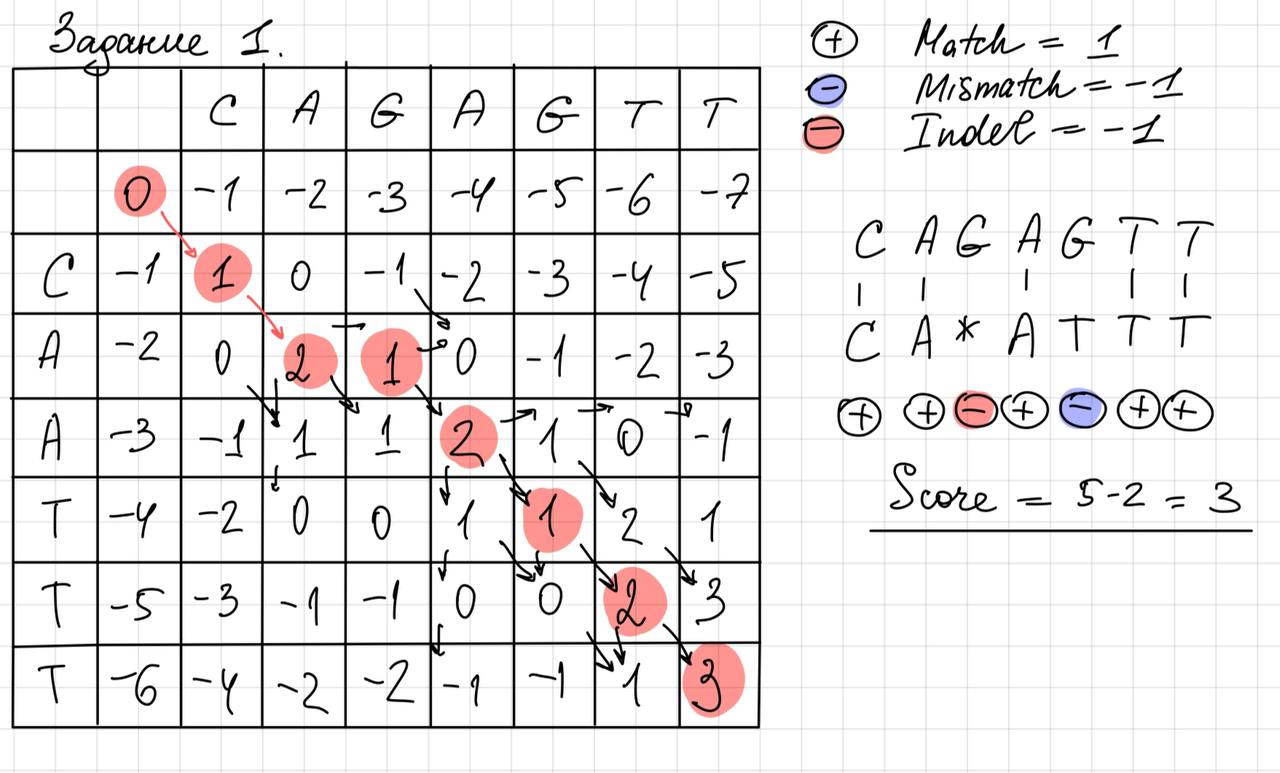

# Задание 2


## Алгоритм Нидлмана-Вунша

In [30]:
import numpy as np
def Needleman_Wunsch():
    seq_1 = input("Введите последовательность 1: ")
    seq_2 = input("Введите последовательность 2: ")
    
    # Matrices
    score_matrix = np.zeros ((len(seq_1)+1,len(seq_2)+1))
    match_matrix = np.zeros((len(seq_1),len(seq_2)))
    
    # Scores
    match = int(input("Введите match: "))
    mismatch = int(input("Введите mismatch: "))
    gap = int(input("Введите gap: "))
    
    for i in range(len(seq_1)):
        for j in range(len(seq_2)):
            if seq_1[i] == seq_2[j]:
                match_matrix[i][j] = match
            else:
                match_matrix[i][j] = mismatch
    
    for i in range(len(seq_1)+1):
        score_matrix[i][0] = i * gap
    for j in range(len(seq_2)+1):
        score_matrix[0][j] = j * gap
        
    for i in range(1,len(seq_1)+1):
        for j in range (1,len(seq_2)+1):
            score_matrix[i][j] = max(score_matrix[i-1][j-1] + match_matrix[i-1][j-1],
                                    score_matrix[i-1][j] + gap,
                                    score_matrix[i][j-1] + gap)
    
    print(score_matrix)
    
    # Traceback
    aligned_seq_1 = ""
    aligned_seq_2 = ""
    
    ti = len(seq_1)
    tj = len(seq_2)
    
    while(ti > 0 and tj > 0):
        if (ti > 0 and tj > 0 and score_matrix[ti][tj] == score_matrix[ti-1][tj-1] + match_matrix[ti-1][tj-1]):
            aligned_seq_1 = seq_1[ti-1] + aligned_seq_1
            aligned_seq_2 = seq_2[tj-1] + aligned_seq_2
            ti = ti - 1
            tj = tj - 1
        
        elif(ti > 0 and score_matrix[ti][tj] == score_matrix[ti-1][tj] + gap):
            aligned_seq_1 = seq_1[ti-1] + aligned_seq_1
            aligned_seq_2 = "-" + aligned_seq_2
            ti = ti - 1
        
        else:
            aligned_seq_1 = "-" + aligned_seq_1
            aligned_seq_2 = seq_2[tj-1] + aligned_seq_2
            tj = tj - 1
            
    #Test
    print(aligned_seq_2)
    print(aligned_seq_1)
    print("Общий score выравнивания:", score_matrix[len(seq_1)][len(seq_2)])

In [32]:
Needleman_Wunsch()

Введите последовательность 1:  CAGAGTT
Введите последовательность 2:  CAATTT
Введите match:  1
Введите mismatch:  -1
Введите gap:  -1


[[ 0. -1. -2. -3. -4. -5. -6.]
 [-1.  1.  0. -1. -2. -3. -4.]
 [-2.  0.  2.  1.  0. -1. -2.]
 [-3. -1.  1.  1.  0. -1. -2.]
 [-4. -2.  0.  2.  1.  0. -1.]
 [-5. -3. -1.  1.  1.  0. -1.]
 [-6. -4. -2.  0.  2.  2.  1.]
 [-7. -5. -3. -1.  1.  3.  3.]]
CA-ATTT
CAGAGTT
Общий score выравнивания: 3.0


In [36]:
Needleman_Wunsch()

Введите последовательность 1:  AAAGTGA
Введите последовательность 2:  CAATGC
Введите match:  2
Введите mismatch:  -1
Введите gap:  -3


[[  0.  -3.  -6.  -9. -12. -15. -18.]
 [ -3.  -1.  -1.  -4.  -7. -10. -13.]
 [ -6.  -4.   1.   1.  -2.  -5.  -8.]
 [ -9.  -7.  -2.   3.   0.  -3.  -6.]
 [-12. -10.  -5.   0.   2.   2.  -1.]
 [-15. -13.  -8.  -3.   2.   1.   1.]
 [-18. -16. -11.  -6.  -1.   4.   1.]
 [-21. -19. -14.  -9.  -4.   1.   3.]]
CAA-TGC
AAAGTGA
Общий score выравнивания: 3.0


## Алгоритм Смита-Вотермана

In [43]:
def Smith_Waterman():
    seq_1 = input("Введите последовательность 1: ")
    seq_2 = input("Введите последовательность 2: ")
    
    score_matrix = np.zeros((len(seq_1) + 1, len(seq_2) + 1))
    match_matrix = np.zeros((len(seq_1), len(seq_2)))
    
    match = int(input("Введите match: "))
    mismatch = int(input("Введите mismatch: "))
    gap = int(input("Введите gap: "))
    
    for i in range(len(seq_1)):
        for j in range(len(seq_2)):
            if seq_1[i] == seq_2[j]:
                match_matrix[i][j] = match
            else:
                match_matrix[i][j] = mismatch
    
    for i in range(1, len(seq_1) + 1):
        for j in range(1, len(seq_2) + 1):
            score_matrix[i][j] = max(
                0,  # Локальное выравнивание: отрицательные значения заменяются на 0
                score_matrix[i - 1][j - 1] + match_matrix[i - 1][j - 1], 
                score_matrix[i - 1][j] + gap,
                score_matrix[i][j - 1] + gap 
            )
    
    print("Матрица score_matrix:")
    print(score_matrix)
    
    # Трассировка
    aligned_seq_1 = ""
    aligned_seq_2 = ""
    
    max_score = np.max(score_matrix)
    max_indices = np.where(score_matrix == max_score)
    ti, tj = max_indices[0][0], max_indices[1][0] 
    while ti > 0 and tj > 0 and score_matrix[ti][tj] > 0:
        if ti > 0 and tj > 0 and score_matrix[ti][tj] == score_matrix[ti - 1][tj - 1] + match_matrix[ti - 1][tj - 1]:
            aligned_seq_1 = seq_1[ti - 1] + aligned_seq_1
            aligned_seq_2 = seq_2[tj - 1] + aligned_seq_2
            ti -= 1
            tj -= 1
        elif ti > 0 and score_matrix[ti][tj] == score_matrix[ti - 1][tj] + gap:
            aligned_seq_1 = seq_1[ti - 1] + aligned_seq_1
            aligned_seq_2 = "-" + aligned_seq_2
            ti -= 1
        else:
            aligned_seq_1 = "-" + aligned_seq_1
            aligned_seq_2 = seq_2[tj - 1] + aligned_seq_2
            tj -= 1
    
    print("Выравнивание:")
    print(aligned_seq_1)
    print(aligned_seq_2)
    print("Общий score выравнивания:", max_score)

In [47]:
Smith_Waterman()

Введите последовательность 1:  CAGAGTT
Введите последовательность 2:  CAATTT
Введите match:  1
Введите mismatch:  -1
Введите gap:  -1


Матрица score_matrix:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 2. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 2. 2. 1.]
 [0. 0. 0. 0. 1. 3. 3.]]
Выравнивание:
CAGAGTT
CA-A-TT
Общий score выравнивания: 3.0


In [49]:
Smith_Waterman()

Введите последовательность 1:  AAAGTGA
Введите последовательность 2:  CAATGC
Введите match:  2
Введите mismatch:  -1
Введите gap:  -3


Матрица score_matrix:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 2. 0. 0. 0.]
 [0. 0. 2. 4. 1. 0. 0.]
 [0. 0. 2. 4. 3. 0. 0.]
 [0. 0. 0. 1. 3. 5. 2.]
 [0. 0. 0. 0. 3. 2. 4.]
 [0. 0. 0. 0. 0. 5. 2.]
 [0. 0. 2. 2. 0. 2. 4.]]
Выравнивание:
AAAG
AATG
Общий score выравнивания: 5.0


# Задание 3
Сверка с библиотечными реализациями

In [61]:
pip install biopython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 8.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.8 MB 3.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 2.7 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 2.6 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [67]:
from Bio.Align import PairwiseAligner

seq_1 = input("Введите последовательность 1: ")
seq_2 = input("Введите последовательность 2: ")

aligner = PairwiseAligner()

aligner.match_score = int(input("Введите score для match: "))
aligner.mismatch_score = int(input("Введите score для mismatch: "))
aligner.gap_score = int(input("Введите score для gap: "))

def print_alignments(alignments, title):
    print(f"\n{title}:")
    if not alignments:
        print("Нет подходящих выравниваний.")
        return
    for i, alignment in enumerate(alignments, start=1):
        print(f"\nВыравнивание {i}:")
        print(alignment)
        print(f"Score: {alignment.score}")
    best_alignment = alignments[0]
    print("\nЛучшее выравнивание:")
    print(best_alignment)
    print(f"Score: {best_alignment.score}")

# Нидлман-Вунш
aligner.mode = 'global'
global_alignments = aligner.align(seq_1, seq_2)
print_alignments(global_alignments, "Глобальное выравнивание (Нидлман-Вунш)")

# Смит-Вотерман
aligner.mode = 'local'
local_alignments = aligner.align(seq_1, seq_2)
print_alignments(local_alignments, "Локальное выравнивание (Смит-Вотерман)")

Введите последовательность 1:  CAGAGTT
Введите последовательность 2:  CAATTT
Введите score для match:  1
Введите score для mismatch:  -1
Введите score для gap:  -1



Глобальное выравнивание (Нидлман-Вунш):

Выравнивание 1:
target            0 CAGAGTT 7
                  0 ||-|.|| 7
query             0 CA-ATTT 6

Score: 3.0

Лучшее выравнивание:
target            0 CAGAGTT 7
                  0 ||-|.|| 7
query             0 CA-ATTT 6

Score: 3.0

Локальное выравнивание (Смит-Вотерман):

Выравнивание 1:
target            0 CAGAGTT 7
                  0 ||-|-|| 7
query             0 CA-A-TT 5

Score: 3.0

Выравнивание 2:
target            0 CAGAGTT 7
                  0 ||-|.|| 7
query             0 CA-ATTT 6

Score: 3.0

Лучшее выравнивание:
target            0 CAGAGTT 7
                  0 ||-|-|| 7
query             0 CA-A-TT 5

Score: 3.0


In [69]:
seq_1 = input("Введите последовательность 1: ")
seq_2 = input("Введите последовательность 2: ")

aligner = PairwiseAligner()

aligner.match_score = int(input("Введите score для match: "))
aligner.mismatch_score = int(input("Введите score для mismatch: "))
aligner.gap_score = int(input("Введите score для gap: "))

# Нидлман-Вунш
aligner.mode = 'global'
global_alignments = aligner.align(seq_1, seq_2)
print_alignments(global_alignments, "Глобальное выравнивание (Нидлман-Вунш)")

# Смит-Вотерман
aligner.mode = 'local'
local_alignments = aligner.align(seq_1, seq_2)
print_alignments(local_alignments, "Локальное выравнивание (Смит-Вотерман)")

Введите последовательность 1:  AAAGTGA
Введите последовательность 2:  CAATGC
Введите score для match:  2
Введите score для mismatch:  -1
Введите score для gap:  -3



Глобальное выравнивание (Нидлман-Вунш):

Выравнивание 1:
target            0 AAAGTGA 7
                  0 .||-||. 7
query             0 CAA-TGC 6

Score: 3.0

Лучшее выравнивание:
target            0 AAAGTGA 7
                  0 .||-||. 7
query             0 CAA-TGC 6

Score: 3.0

Локальное выравнивание (Смит-Вотерман):

Выравнивание 1:
target            0 AAAG 4
                  0 ||.| 4
query             1 AATG 5

Score: 5.0

Выравнивание 2:
target            1 AAGTG 6
                  0 ||-|| 5
query             1 AA-TG 5

Score: 5.0

Выравнивание 3:
target            2 AGTG 6
                  0 |.|| 4
query             1 AATG 5

Score: 5.0

Лучшее выравнивание:
target            0 AAAG 4
                  0 ||.| 4
query             1 AATG 5

Score: 5.0


Как видим, наш код работает идентично функциям из библиотеки Biopython